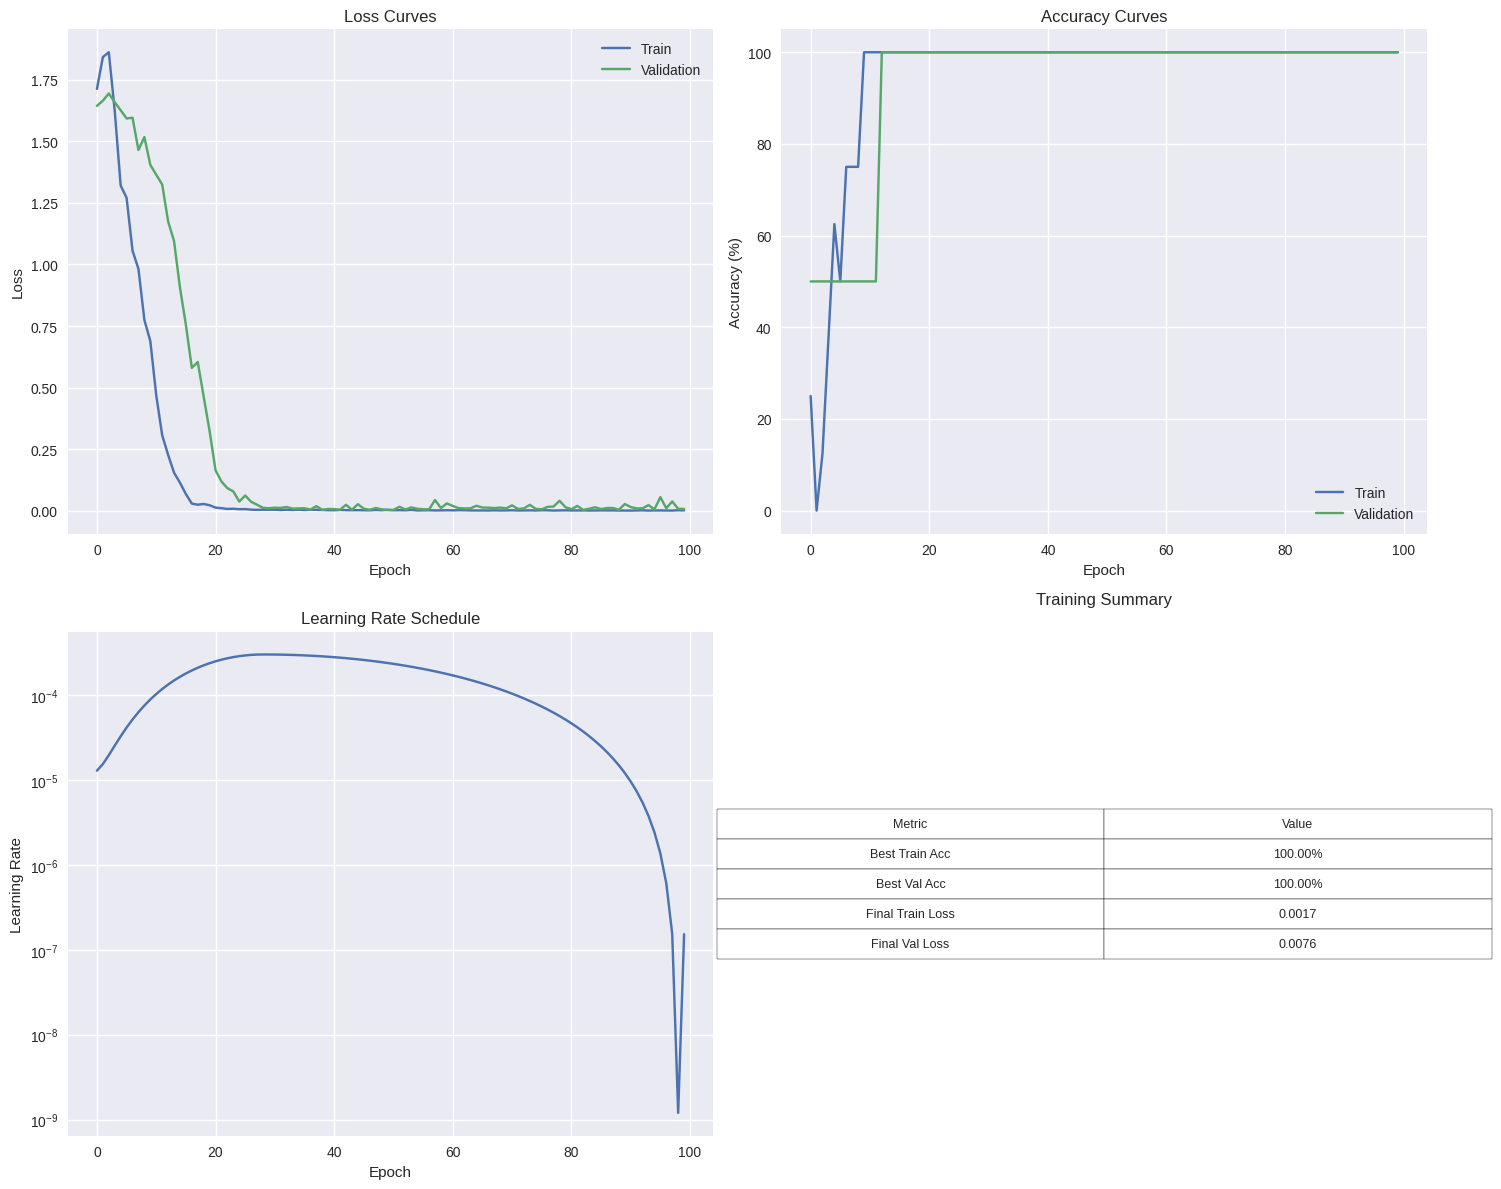

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path

BASE_DIR = Path('/home/kasinadhsarma/dr-detection/backend')
metrics_file = BASE_DIR / 'models' / 'training_metrics.csv'

# Read metrics
df = pd.read_csv(metrics_file)

# Set style
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [15, 10]

# Create visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Loss curves
ax1.plot(df['epoch'], df['train_loss'], label='Train')
ax1.plot(df['epoch'], df['val_loss'], label='Validation')
ax1.set_title('Loss Curves')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True)

# Accuracy curves
ax2.plot(df['epoch'], df['train_acc'], label='Train')
ax2.plot(df['epoch'], df['val_acc'], label='Validation')
ax2.set_title('Accuracy Curves')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.legend()
ax2.grid(True)

# Learning rate
ax3.plot(df['epoch'], df['lr'])
ax3.set_title('Learning Rate Schedule')
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Learning Rate')
ax3.set_yscale('log')
ax3.grid(True)

# Training summary
stats = pd.DataFrame({
    'Metric': ['Best Train Acc', 'Best Val Acc', 'Final Train Loss', 'Final Val Loss'],
    'Value': [
        f"{df['train_acc'].max():.2f}%",
        f"{df['val_acc'].max():.2f}%",
        f"{df['train_loss'].iloc[-1]:.4f}",
        f"{df['val_loss'].iloc[-1]:.4f}"
    ]
})

ax4.axis('off')
table = ax4.table(cellText=stats.values, colLabels=stats.columns,
                 loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.2, 1.5)
ax4.set_title('Training Summary', pad=20)

plt.tight_layout()
plt.show()